# Digit Rcognition using CNN
## Importing Stuff

In [1]:
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

/home/luci4/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

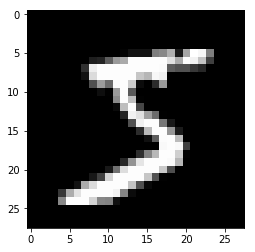

5


In [3]:
## Looking at a sample
plt.imshow(X_train[0], cmap="gray")
plt.show()
print (y_train[0])

## Data Preprocessing
### Reshaping Stuff
We need to reshape our dataset inputs (X_train and X_test) to the shape that our model expects when we train the model. The first number is the number of images (X_train -> 60000, X_test -> 10000). Then comes the shape of each image i.e. (28, 28). The last number 1 signifies that the image is greyscale

In [4]:
## Checking out the shapes involved in dataset
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [5]:
# Reshaping so as to convert images for our model
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [6]:
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28, 1)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28, 1)
Shape of y_test: (10000,)


### One-Hot Encoding
We need to hot encode our target variables. Basically, a column will be created for each kind of output and a binary variable is inputted for each kind. For example, if the image is of the number 6, then the label instead of being = 6, it will have a value 1 in column 7 and 0 in rest of the columns, like [0,0,0,0,0,0,1,0,0]

In [7]:
### Lets one hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Building the model
Let's build the model

In [8]:
## Declare the model
model = Sequential()

## Declare the layers
layer_1 = Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1))
layer_2 = Conv2D(32, kernel_size=3, activation='relu')
layer_3 = Flatten()
layer_4 = Dense(10, activation='softmax')

## Add the layers to the model
model.add(layer_1)
model.add(layer_2)
model.add(layer_3)
model.add(layer_4)

The model type that we will be using is Sequential.<br>
Sequential is the easiest way to build a model in Keras. It allows to build the model layer by layer.<br>
*add()* function is used for adding successive layers.<br><br>
The first 2 layers are Conv2D layers. These are convolution layers that will deal with our input images, which are seen as 2D matrices.<br><br>
64 nodes in first layer and 32 nodes in the second layer are being used here. These numbers can be adjusted accordingly, depending on the size of the dataset. In this case, 64 and 32 seem to be working just fine.<br><br>
__Kernel Size__ is the size of the filter matrix for our convolution. So, kernel size 3 means that a 3x3 filter matrix is going to be used.<br><br>
__Activation__ is the activation function for the layer. The activation function here being used for the first 2 layers is the ReLU, or Rectified Linear Activation. This activation function is known for performing well in terms of speed and output in the neural nets.


### Flow of the model
- The first layer takes in an input shape, here, being 28, 28, 1 where 1 signifies greyscale.
- In between the Conv2D layers and the dense layer, there is a "Flatten" layer. Flatten serves as a connection between convolutional and dense layers.
- 'Dense' is the layer type which is being used for output layer. Dense is a standard layer type that is used in many cases for neural networks.
- We will have 10 nodes in our output layer, one for each possible outcome (0-9)
- The activation function is 'softmax'. Softmax makes the output sum up tp 1, so that the output contains a series of probabilities.
- The model will predict the one with the highest probability.


## Compiling the model
Compiling the model takes three parameters:
- __Optimizer__ - It controls the learning rate. We will be using 'adam' optimizer. It is a very good optimizer as it utilises the perks of both Stochastic gradient and RMSprop optimizers.
- __Loss function__ - We will be using 'categorical_crossentropy' loss function. It is the most common choice for classification. A lower score corresponds to better performance.
- __Metrics__ - To make things easier to interpret, we will be using 'accuracy' metrix to see the accuracy score on the validation set while training the model.

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Training the model

In [10]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 60s 1ms/step - loss: 0.3154 - acc: 0.9462 - val_loss: 0.0980 - val_acc: 0.9717
Epoch 2/3
60000/60000 [==============================] - 60s 999us/step - loss: 0.0613 - acc: 0.9812 - val_loss: 0.0792 - val_acc: 0.9764
Epoch 3/3
60000/60000 [==============================] - 56s 930us/step - loss: 0.0438 - acc: 0.9862 - val_loss: 0.0968 - val_acc: 0.9745


Yayyyy!!!! The model seems to be ready after 3 epochs with an amazing accuracy of 97.8%

## Predicting and Testing

Prediction (Softmax) from the neural network:

 [[9.9990785e-01 8.3425657e-09 9.1445610e-05 1.7155021e-09 3.8955286e-13
  2.1683030e-10 3.2575894e-08 1.2667306e-13 7.7635931e-08 5.9899588e-07]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


--------- Prediction --------- 




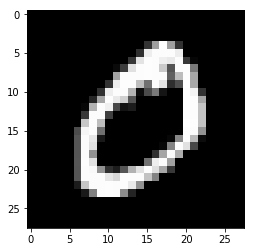



Final Output: 0


In [12]:
example = X_train[1]
prediction = model.predict(example.reshape(1, 28, 28, 1))
print ("Prediction (Softmax) from the neural network:\n\n {}".format(prediction))
hard_maxed_prediction = np.zeros(prediction.shape)
hard_maxed_prediction[0][np.argmax(prediction)] = 1
print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))

print ("\n\n--------- Prediction --------- \n\n")
plt.imshow(example.reshape(28, 28), cmap="gray")
plt.show()
print("\n\nFinal Output: {}".format(np.argmax(prediction)))
